In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    RobustScaler,
    PowerTransformer,
)
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("fivethirtyeight")

In [83]:
dataset = pd.read_csv("./customer_data.csv")
dataset.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

In [84]:
dataset.describe()

id            age         income  purchase_amount  \
count  100000.000000  100000.000000  100000.000000    100000.000000   
mean    50000.500000      30.003260   27516.269880      9634.790840   
std     28867.657797       4.480535   12996.782587      4799.339449   
min         1.000000      12.000000    5000.000000      1118.000000   
25%     25000.750000      27.000000   16271.750000      5583.000000   
50%     50000.500000      30.000000   27584.500000      9452.000000   
75%     75000.250000      33.000000   38747.250000     13350.000000   
max    100000.000000      49.000000   50000.000000     26204.000000   

       promotion_usage  satisfaction_score  
count    100000.000000       100000.000000  
mean          0.300800            5.009650  
std           0.458608            1.038714  
min           0.000000            0.000000  
25%           0.000000            4.000000  
50%           0.000000            5.000000  
75%           1.000000            6.000000  
max           1.000000           10.000000

In [85]:
loyalty_status = dataset["loyalty_status"]
dataset.drop("loyalty_status", axis=1, inplace=True)
loyalty_status.unique()

array(['Gold', 'Regular', 'Silver'], dtype=object)

In [86]:
loyalty_status.infer_objects(copy=False).replace(
    {
        "Regular": 1,
        "Silver": 2,
        "Gold": 3,
    },
    inplace=True,
)

/tmp/ipykernel_15714/921274594.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loyalty_status.infer_objects(copy=False).replace(
/tmp/ipykernel_15714/921274594.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loyalty_status.infer_objects(copy=False).replace(


In [87]:
categorical_cols = dataset.select_dtypes(include="object").columns
categorical_cols

Index(['gender', 'education', 'region', 'purchase_frequency',
       'product_category'],
      dtype='object')

## Visualizing the Dataset

In [97]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    Th

In [111]:
def plot_relational_graph(x, y):
    """
    Creates a scatter plot visualizing the relationship between two variables in a dataset.

    Args:
        x (str): The name of the first variable (x-axis) in the dataset.
        y (str): The name of the second variable (y-axis) in the dataset.

    Returns:
        None. (The function creates a plot and does not return a value.)
    """
    plt.scatter(dataset[x], dataset[y])
    plt.title(f"Scatter Plot of {y.title()} against {x.title()}")
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    plt.xlim(-np.min(dataset[x]) * 1.5, np.max(dataset[x]) * 1.5)

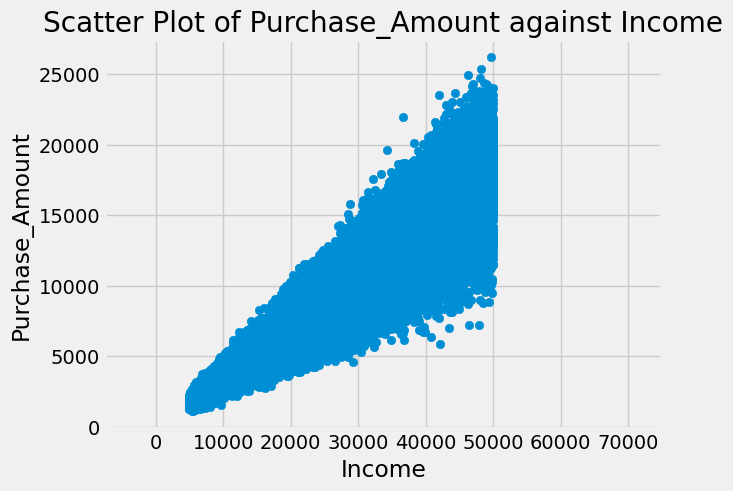

In [112]:
plot_relational_graph('income', 'purchase_amount')

In [114]:
def plot_histogram(x):
    """
    Creates a histogram visualizing the distribution of a variable in a dataset.

    Args:
        x (str): The name of the variable to create the histogram for (x-axis).

    Returns:
        None. (The function creates a plot and does not return a value.)
    """
    plt.hist(dataset[x])
    plt.title(f"Histogram of {x.title()}")
    plt.xlabel(x.title())
    plt.ylabel('Frequency')
    

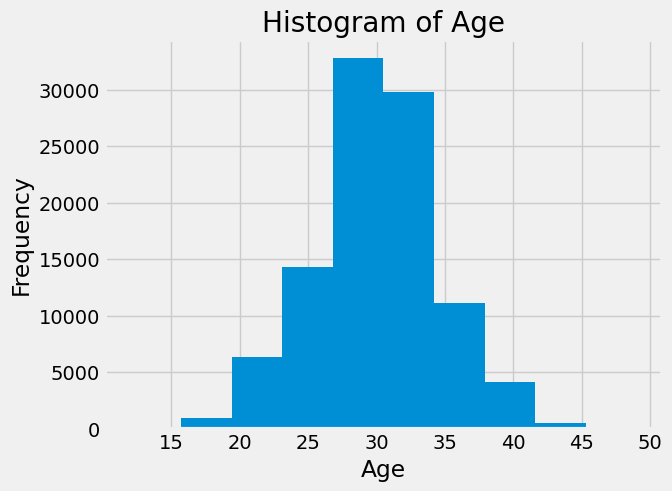

In [115]:
plot_histogram('age')

## Encoding Categorical Values
Label Encoding gives a sense of hierachy to category values, which is what we hope to achieve with those values

In [9]:
label_encoded_features = [
    "education",
    "purchase_frequency",
    "gender",
    "region",
    "product_category",
]

# Label Encoding
for feature in label_encoded_features:
    label_encoder = LabelEncoder()
    dataset[f"{feature}_label"] = label_encoder.fit_transform(dataset[feature])

In [10]:
dataset.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'purchase_frequency', 'purchase_amount', 'product_category',
       'promotion_usage', 'satisfaction_score', 'education_label',
       'purchase_frequency_label', 'gender_label', 'region_label',
       'product_category_label'],
      dtype='object')

In [17]:
columns = ["age", "income", "purchase_amount", "promotion_usage", "satisfaction_score"]
label_encoded_columns = [f"{feature}_label" for feature in label_encoded_features]

training_columns = columns + label_encoded_columns
features = dataset[training_columns]

In [56]:
training_columns

['age',
 'income',
 'purchase_amount',
 'promotion_usage',
 'satisfaction_score',
 'education_label',
 'purchase_frequency_label',
 'gender_label',
 'region_label',
 'product_category_label']

## Normalize features

In [18]:
# RobustScaler removes the median and scales the data according to the quantile range
# and is more robust to outliers
scaler = RobustScaler()
scaled_features = scaler.fit_transform(features)

# scaled_features = features
# scaled_features = kbest.fit_transform(scaled_features, loyalty_status)

In [19]:
training_columns

['age',
 'income',
 'purchase_amount',
 'promotion_usage',
 'satisfaction_score',
 'education_label',
 'purchase_frequency_label',
 'gender_label',
 'region_label',
 'product_category_label']

In [20]:
# kbest.__dict__

In [21]:
# [col for indx, col in enumerate(training_columns) if kbest.get_support()[indx]], len(training_columns)

## K-Means fitting and Clustering

Instantiate the K-Means SkLearn class

In [25]:
# plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Elbow method

In [26]:
def elbow_cluster_fit():
    kmeans_kwargs = {
        "init": "random",
        "n_init": "auto",
        "max_iter": 300,
        "random_state": 42,
    }

    # A list holds the SSE values for each k
    k_range = range(1, 10)
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)
    plt.style.use("fivethirtyeight")
    plt.title("k-Means - Elbow Method")
    plt.plot(k_range, sse)
    plt.xticks(k_range)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

    return sse

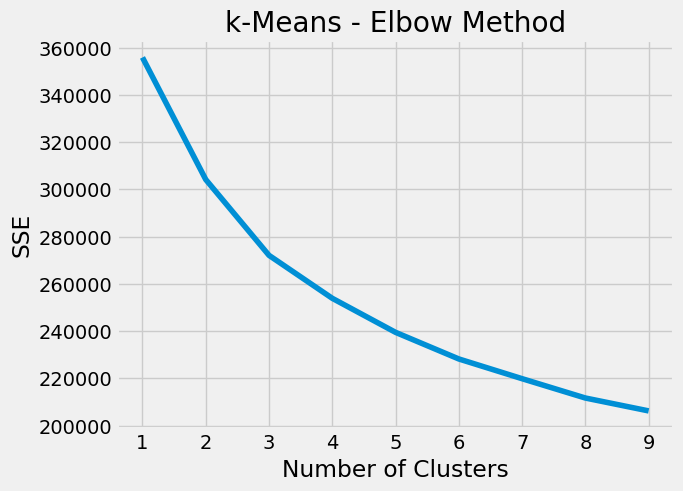

[355806.2018859718,
 304134.85892738914,
 272044.1173963875,
 253855.29869389883,
 239449.71095456815,
 228183.49717060794,
 219833.39602152287,
 211653.61017123263,
 206197.96582167342]

In [27]:
elbow_cluster_fit()

## k-means Silhouette Method

In [28]:
def silhouette_cluster_fit():
    kmeans_kwargs = {
        "init": "random",
        "n_init": "auto",
        "max_iter": 300,
        "random_state": 42,
    }
    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []
    k_range = range(2, 11)

    # Notice you start at 2 clusters for silhouette coefficient
    for k in k_range:
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        print("Calculating silheouette_score for run: ", k)
        score = silhouette_score(scaled_features, kmeans.labels_, n_jobs=-1)
        silhouette_coefficients.append(score)

    plt.style.use("fivethirtyeight")
    plt.title("k-Means - Elbow Method")
    plt.plot(k_range, silhouette_coefficients)
    plt.xticks(k_range)
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

    return silhouette_coefficients

In [29]:
silhouette_cluster_fit()

Calculating silheouette_score for run:  2


KeyboardInterrupt: 

In [49]:
kmeans = KMeans(init="random", n_clusters=2, random_state=50)

In [57]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=50)

In [58]:
def plot_clusters(kmeans, x_feature=0, y_feature=1):
    """
    x_feature: The index of the feature that should be plotted on the x-axis
    y_feature: The index of the feature that should be plotted on the y-axis
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
    fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
    fte_colors = {
        0: "#008fd5",
        1: "#fc4f30",
        2: "#FFBB00",
        3: "#303030",
        4: "#EE82EE",
        5: "#007F0E",
        6: "#909000",
        7: "#101214",
        8: "#101A11",
        9: "#10C224",
    }
    # The k-means plot
    km_colors = [fte_colors[label] for label in kmeans.labels_]
    ax1.scatter(
        scaled_features[:, x_feature], scaled_features[:, y_feature], c=km_colors
    )
    ax1.set_title(f"k-means\nSilhouette: kmeans_silhouette", fontdict={"fontsize": 12})
    # The dbscan plot
    db_colors = [fte_colors[label] for label in kmeans.labels_]
    ax2.scatter(scaled_features[:, 1], scaled_features[:, 2], c=db_colors)
    ax2.set_title(f"DBSCAN\nSilhouette: dbscan_silhouette", fontdict={"fontsize": 12})
    plt.show()

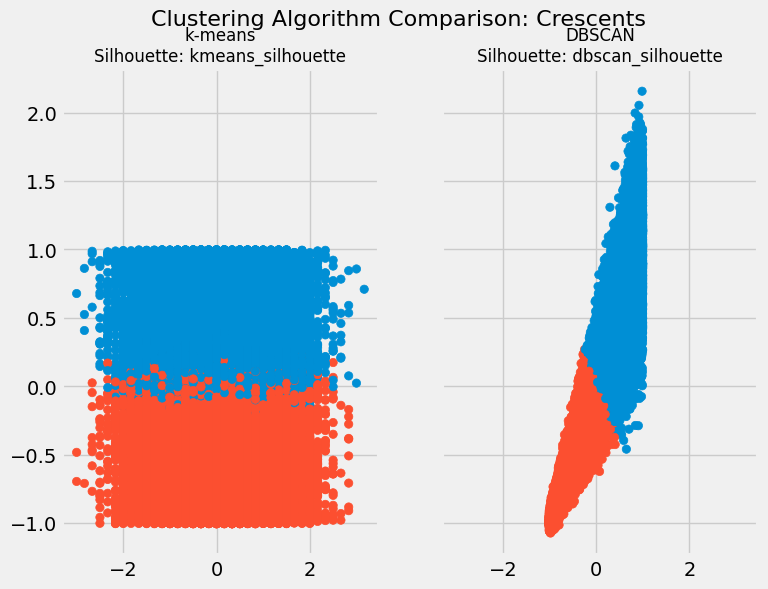

In [52]:
plot_clusters(kmeans, 0, 1)

In [53]:
print("The lowest SSE value: ", kmeans.inertia_)
print("The number of iterations required to converge: ", kmeans.n_iter_)

The lowest SSE value:  304134.87358878925
The number of iterations required to converge:  12


In [54]:
dataset["pred_labels"] = kmeans.labels_

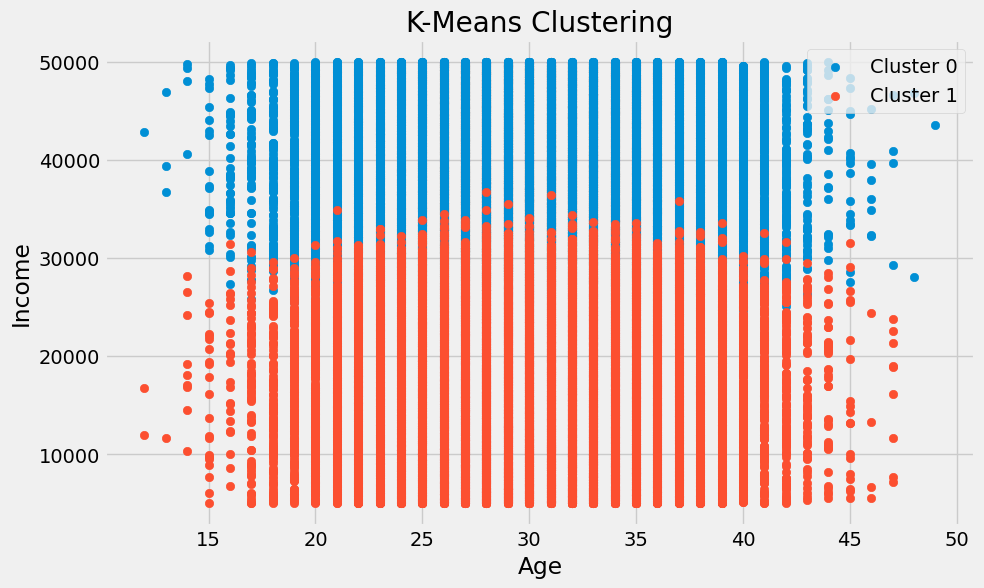

In [55]:
plt.figure(figsize=(10, 6))
for cluster in dataset["pred_labels"].unique():
    cluster_data = dataset[dataset["pred_labels"] == cluster]
    plt.scatter(cluster_data["age"], cluster_data["income"], label=f"Cluster {cluster}")

plt.title("K-Means Clustering")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()

## Line Fitting

In [66]:
X = scaler.fit_transform(features.drop(columns=['income']))
y = scaler.fit_transform(features[['income']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [72]:
# Initialize model
gradient_boosting = GradientBoostingRegressor(n_estimators=100)
gradient_boosting.fit(X_train, y_train.ravel())

GradientBoostingRegressor()

In [75]:
y_pred = gradient_boosting.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting - MSE: {mse}, R2 Score: {r2}")

Gradient Boosting - MSE: 0.027235714006257194, R2 Score: 0.9182671381255512


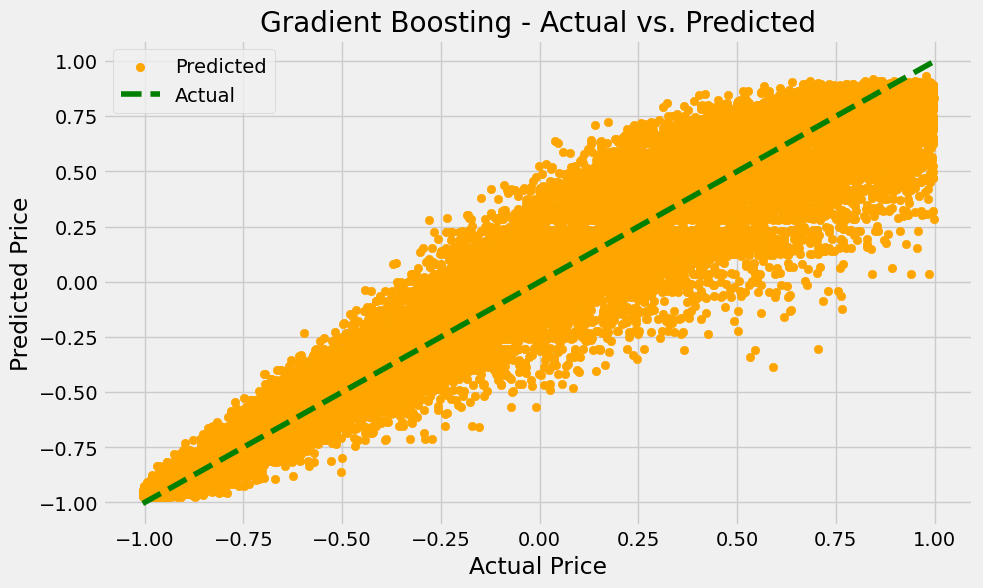

In [79]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='orange', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--', label='Actual')
plt.title(f"Gradient Boosting - Actual vs. Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()